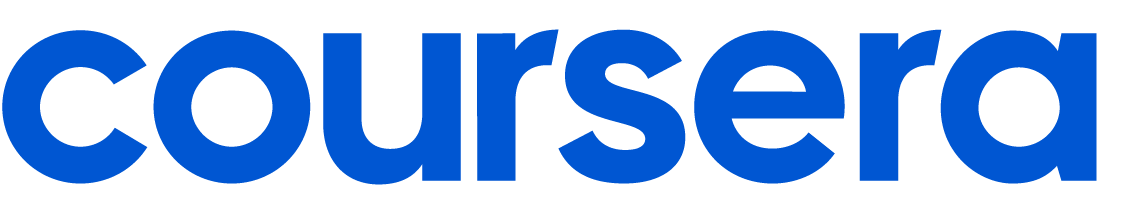

# Welcome to Challenge Labs!

Challenge labs provide CS & DS Coding Competitions with Prizes that Change Learners’ Lives!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly life changing like job interviews at real companies.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the retention prediction problem on a very unique and interesting group of subscribers, Coursera learners! On Coursera, learners can subscribe to sets of courses in order to gain full access to graded assignments, hands-on projects, and course completion certificates. One of the most common ways that learners subscribe to content is via [Specialization Subscriptions](https://www.coursera.support/s/article/216348103-Coursera-subscriptions?language=en_US#specialization), which give learners unlimited access to the courses in a specific specialization on a month-to-month basis.

Imagine that you are a new data scientist at Coursera and you are tasked with building a model that can predict which existing specialization subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the learner completes the specialization or reaches their learning goal and no longer needs the subscription
* the learner finds themselves to be too busy and cancels their subscription until a later time
* the learner determines that the specialization is not the best fit for their learning goals, so they cancel and look for something better suited

Regardless the reason, Coursera has a vested interest in understanding the likelihood of each individual learner to retain in their subscription so that resources can be allocated appropriately to support learners across the various stages of their learning journeys. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past specialization subscriptions that contain information about the learner, the specialization, and the learner's activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (509,837 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (217,921 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique specialization subscription. For each subscription, a single observation (`subscription_id`) is included as of a particular date (`observation_dt`) during which the subscription was active. This date was chosen at random from all the dates during which the subscription was active. In some instances it is soon after the subscription was initiated; in other instances, it is several months after the subscription was initiated and after several previous payments were made. Therefore, your model will have to be able to adapt to different stages of the subscription.

In addition to those identifier columns, the `train.csv` dataset also contains the target label for the task, a binary column `is_retained`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,subscription_id,Identifier,character,Unique identifier of each subscription
1,observation_dt,Identifier,date,The date on which the subscription was observed to calculate the features in the dataset. It was chosen at random amongst all the dates between the start of the subscription and the end of the subscription (before cancellation)
2,is_retained,Target,Integer,"TRAINING SET ONLY! 0 = the learner cancelled their subscription before next payment, 1 = the learner made an additional payment in this subscription"
3,specialization_id,Feature - Specialization Info,character,Unique identifier of a specialization (each subscription gives a learner access to a particular specialization)
4,cnt_courses_in_specialization,Feature - Specialization Info,integer,number of courses in the specialization
5,specialization_domain,Feature - Specialization Info,character,"primary domain of the specialization (Computer Science, Data Science, etc.)"
6,is_professional_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""professional certicate"" (a special type of specialization that awards completers with an industry-sponsored credential)"
7,is_gateway_certificate,Feature - Specialization Info,boolean,"BOOLEAN for whether the specialization is a ""gateway certificate"" (a special type of specialization geared towards learners starting in a new field)"
8,learner_days_since_registration,Feature - Learner Info,integer,Days from coursera registration date to the date on which the observation is made
9,learner_country_group,Feature - Learner Info,character,"the region of the world that the learner is from (United States, East Asia, etc.)"


## How to Submit your Predictions to Coursera

Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 217,921 rows (plus a header row). The first column should be `subscription_id` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription is retained__.

Your submission will show an error if you have extra columns (beyond `subscription_id` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `subscription_id` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import any other packages you may want to use
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
!pip install xgboost
from xgboost import XGBClassifier

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [5]:
train_df = pd.read_csv("train.csv")
train_df.shape

(413955, 37)

In [6]:
test_df = pd.read_csv("test.csv")
test_df.shape

(217921, 36)

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [7]:
train_df.head()

,subscription_id,observation_dt,is_retained,specialization_id,cnt_courses_in_specialization,specialization_domain,is_professional_certificate,is_gateway_certificate,learner_days_since_registration,learner_country_group,...,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,is_active_capstone_during_pay_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity
0,--rKikbGEeyQHQqIvaM5IQ,2022-05-04,1.0,kr43OcbTEeqeNBKhfgCLyw,8.0,Data Science,True,True,2321.0,Northern Europe,...,0.0,0.0,0.0,0.0,False,73.783333,0.000000,68.0,0.0,20.0
1,-0XGzEq2EeyimBISGRuNeQ,2021-11-30,0.0,Q0Fc_Yl0EeqdTApgQ4tM7Q,6.0,Data Science,True,False,612.0,Northern Europe,...,0.0,0.0,0.0,0.0,False,0.850000,0.000000,7.0,2.0,0.0
2,-1P9kOb6EeuRugq1Liq62w,2021-08-13,0.0,9kmimrDIEeqxzQqieMm42w,6.0,Business,True,True,27.0,Australia and New Zealand,...,0.0,1.0,12.0,2.0,False,1.833333,2.983333,2.0,1.0,18.0
3,-2ifTJZbEeuIuRKpAhovaw,2021-08-03,1.0,7lHCSlFIEeeffRIHljDI_g,5.0,Information Technology,True,True,120.0,United States,...,0.0,2.0,83.0,9.0,False,18.450000,7.100000,18.0,4.0,3.0
4,-5YKZbchEeufeAq6C_fAOw,2021-06-04,0.0,kr43OcbTEeqeNBKhfgCLyw,8.0,Data Science,True,True,1228.0,India,...,1.0,1.0,61.0,4.0,False,29.566667,15.250000,18.0,8.0,1.0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413955 entries, 0 to 413954
Data columns (total 37 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   subscription_id                                   413955 non-null  object 
 1   observation_dt                                    413955 non-null  object 
 2   is_retained                                       413954 non-null  float64
 3   specialization_id                                 413954 non-null  object 
 4   cnt_courses_in_specialization                     413954 non-null  float64
 5   specialization_domain                             413953 non-null  object 
 6   is_professional_certificate                       413954 non-null  object 
 7   is_gateway_certificate                            413954 non-null  object 
 8   learner_days_since_registration                   413954 non-null  float64
 9   lear

In [9]:
train_df.describe()

,is_retained,cnt_courses_in_specialization,learner_days_since_registration,learner_cnt_other_courses_active,learner_cnt_other_courses_paid_active,learner_cnt_other_courses_items_completed,learner_cnt_other_courses_paid_items_completed,learner_cnt_other_transactions_past,learner_other_revenue,subscription_period_order,...,cnt_enrollments_started_during_payment_period,cnt_enrollments_completed_during_payment_period,cnt_enrollments_active_during_payment_period,cnt_items_completed_during_payment_period,cnt_graded_items_completed_during_payment_period,sum_hours_learning_before_payment_period,sum_hours_learning_during_payment_period,cnt_days_active_before_payment_period,cnt_days_active_during_payment_period,cnt_days_since_last_activity
count,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,...,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000,413954.000000
mean,0.543664,5.926637,745.106720,5.421735,1.281524,114.289404,62.943846,1.966615,101.281442,2.477217,...,0.285387,0.235050,0.681228,21.015035,1.743264,15.596039,3.474727,12.474867,2.585720,29.130662
std,0.498090,1.759559,950.799959,13.819034,3.743262,303.469641,194.269892,6.517240,353.679851,2.352873,...,0.720924,0.655434,0.949700,50.313201,4.422363,27.338616,8.412757,18.937620,4.062454,52.340933
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.150000,0.000000,2.000000,0.000000,1.000000
50%,1.000000,6.000000,279.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.183333,0.000000,6.000000,1.000000,9.000000
75%,1.000000,7.000000,1109.000000,4.000000,1.000000,90.000000,13.000000,1.000000,49.000000,3.000000,...,0.000000,0.000000,1.000000,20.000000,2.000000,18.633333,3.533333,15.000000,4.000000,32.000000
max,1.000000,13.000000,3857.000000,604.000000,215.000000,19439.000000,6912.000000,474.000000,24069.920000,19.000000,...,13.000000,10.000000,11.000000,1043.000000,149.000000,2375.683333,1393.300000,616.000000,31.000000,548.000000


In [10]:
# Checking count of Retained(1) and Non-Retained(0) subscribers
train_df["is_retained"].value_counts()

1.0    225052
0.0    188902
Name: is_retained, dtype: int64

In [11]:
train_df["specialization_domain"].value_counts()

Data Science                        141404
Business                             98244
Computer Science                     74786
Information Technology               65047
Arts and Humanities                  10436
Health                                7297
Language Learning                     7055
Physical Science and Engineering      3352
Social Sciences                       3091
Personal Development                  2362
Math and Logic                         879
Name: specialization_domain, dtype: int64

In [12]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

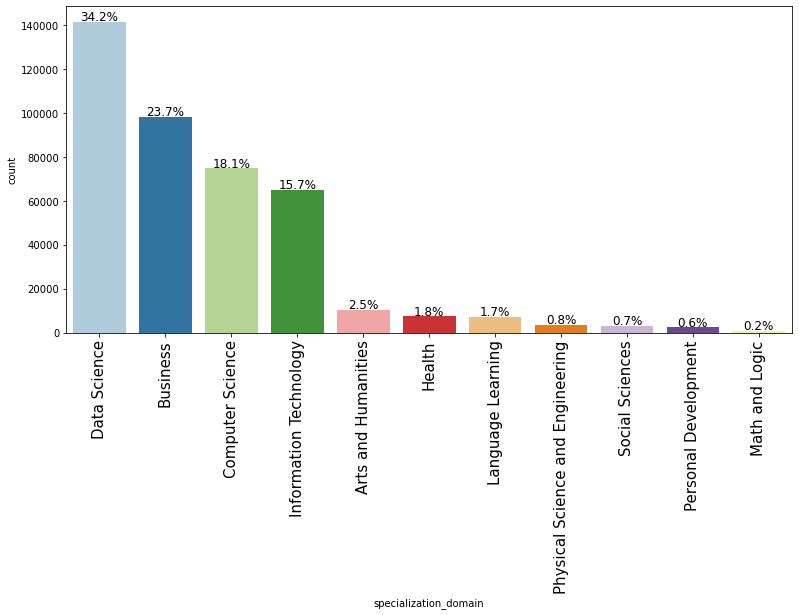

In [13]:
labeled_barplot(train_df, "specialization_domain", perc=True)

From the Bar chart above it can be identified that the specialization domains with the highest subscribers are:
* Data Science
* Business
* Computer Science
* Information Technology

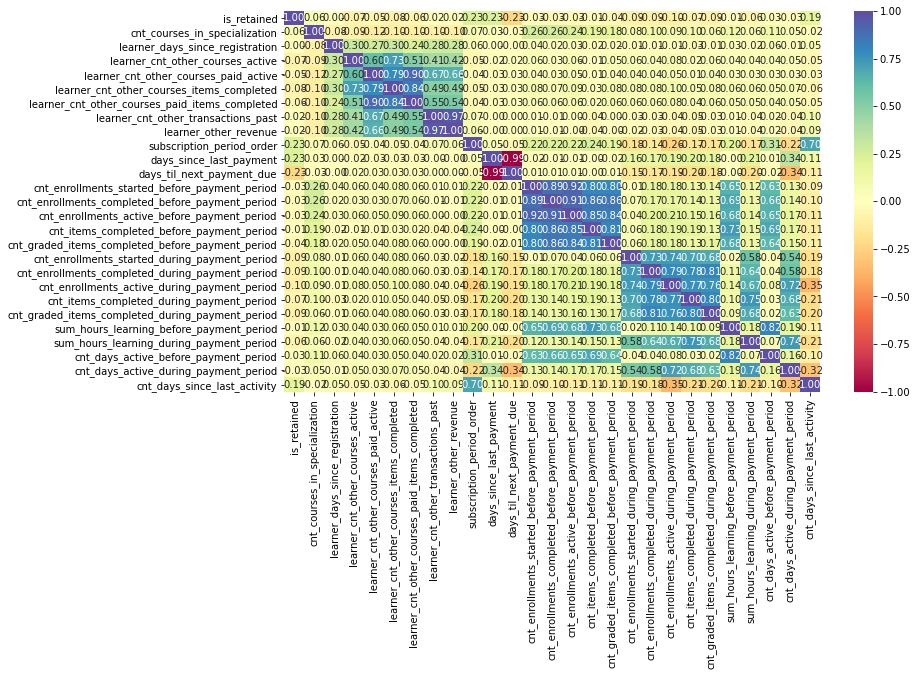

In [14]:
cols_list = train_df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    train_df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [15]:
# Checking correlation of is_retained(target) with other columns
correlation = train_df.corr()
print(correlation["is_retained"].sort_values(ascending=False))

is_retained                                         1.000000
subscription_period_order                           0.234210
days_since_last_payment                             0.230800
cnt_days_since_last_activity                        0.186504
cnt_courses_in_specialization                       0.059671
cnt_days_active_before_payment_period               0.029226
learner_other_revenue                               0.021025
learner_cnt_other_transactions_past                 0.020631
learner_days_since_registration                     0.002649
cnt_items_completed_before_payment_period          -0.010673
sum_hours_learning_before_payment_period           -0.014868
cnt_enrollments_started_before_payment_period      -0.028752
cnt_days_active_during_payment_period              -0.030573
cnt_enrollments_completed_before_payment_period    -0.031761
cnt_enrollments_active_before_payment_period       -0.032123
cnt_graded_items_completed_before_payment_period   -0.041953
learner_cnt_other_course

#### Data Preprocessing

In [16]:
#Data Preprocessing.
#We will drop columns irrelevant for our modelling.
train_df_new = train_df[["is_retained","subscription_period_order","days_since_last_payment","cnt_days_since_last_activity", \
                        "cnt_courses_in_specialization","cnt_days_active_before_payment_period","learner_other_revenue", \
                        "learner_cnt_other_transactions_past", "specialization_domain"]]
test_df_new = test_df[["subscription_period_order","days_since_last_payment","cnt_days_since_last_activity", \
                       "cnt_courses_in_specialization","cnt_days_active_before_payment_period","learner_other_revenue", \
                       "learner_cnt_other_transactions_past", "specialization_domain"]]

In [17]:
train_df_new["specialization_domain"] = train_df_new["specialization_domain"].map({"Data Science": 1, "Business": 2,
                                                                                  "Computer Science": 3, "Information Technology": 4,
                                                                                  "Arts and Humanities": 5, "Health": 6,
                                                                                  "Language Learning": 7, "Physical Science and Engineering": 8,
                                                                                  "Social Sciences": 9, "Personal Development": 10,
                                                                                  "Math and Logic": 11})
test_df_new["specialization_domain"] = test_df_new["specialization_domain"].map({"Data Science": 1, "Business": 2, 
                                                                                "Computer Science": 3, "Information Technology": 4,
                                                                                "Arts and Humanities": 5, "Health": 6,
                                                                                "Language Learning": 7, "Physical Science and Engineering": 8, 
                                                                                "Social Sciences": 9, "Personal Development": 10,
                                                                                "Math and Logic": 11})

In [18]:
train_df_new.isnull().sum()

is_retained                              1
subscription_period_order                1
days_since_last_payment                  1
cnt_days_since_last_activity             1
cnt_courses_in_specialization            1
cnt_days_active_before_payment_period    1
learner_other_revenue                    1
learner_cnt_other_transactions_past      1
specialization_domain                    2
dtype: int64

In [19]:
#Fill NA values with the mode of the column
train_df_new['is_retained'] = train_df_new['is_retained'].fillna(train_df_new['is_retained'].mode()[0])
train_df_new['subscription_period_order'] = train_df_new['subscription_period_order'].fillna(train_df_new['subscription_period_order'].mode()[0])
train_df_new['days_since_last_payment'] = train_df_new['days_since_last_payment'].fillna(train_df_new['days_since_last_payment'].mode()[0])
train_df_new['cnt_days_since_last_activity'] = train_df_new['cnt_days_since_last_activity'].fillna(train_df_new['cnt_days_since_last_activity'].mode()[0])
train_df_new['cnt_courses_in_specialization'] = train_df_new['cnt_courses_in_specialization'].fillna(train_df_new['cnt_courses_in_specialization'].mode()[0])
train_df_new['cnt_days_active_before_payment_period'] = train_df_new['cnt_days_active_before_payment_period'].fillna(train_df_new['cnt_days_active_before_payment_period'].mode()[0])
train_df_new['learner_other_revenue'] = train_df_new['learner_other_revenue'].fillna(train_df_new['learner_other_revenue'].mode()[0])
train_df_new['learner_cnt_other_transactions_past'] = train_df_new['learner_cnt_other_transactions_past'].fillna(train_df_new['learner_cnt_other_transactions_past'].mode()[0])
train_df_new['specialization_domain'] = train_df_new['specialization_domain'].fillna(train_df_new['specialization_domain'].mode()[0])

In [20]:
train_df_new.isnull().sum()

is_retained                              0
subscription_period_order                0
days_since_last_payment                  0
cnt_days_since_last_activity             0
cnt_courses_in_specialization            0
cnt_days_active_before_payment_period    0
learner_other_revenue                    0
learner_cnt_other_transactions_past      0
specialization_domain                    0
dtype: int64

In [21]:
train_df_new.head()

,is_retained,subscription_period_order,days_since_last_payment,cnt_days_since_last_activity,cnt_courses_in_specialization,cnt_days_active_before_payment_period,learner_other_revenue,learner_cnt_other_transactions_past,specialization_domain
0,1.0,6.0,18.0,20.0,8.0,68.0,0.00,0.0,1.0
1,0.0,1.0,1.0,0.0,6.0,7.0,49.41,1.0,1.0
2,0.0,1.0,18.0,18.0,6.0,2.0,0.00,0.0,2.0
3,1.0,4.0,21.0,3.0,5.0,18.0,0.00,0.0,4.0
4,0.0,1.0,10.0,1.0,8.0,18.0,0.00,0.0,1.0


In [23]:
X = train_df_new.drop(columns="is_retained")
y = train_df_new.is_retained

In [24]:
# Standardization of the Features
scaler = StandardScaler()

standardized_data = scaler.fit_transform(X)

print(standardized_data)

[[ 1.49723075  0.64713012 -0.17444493 ... -0.28636472 -0.30175573
  -0.89843716]
 [-0.62783535 -1.31683489 -0.55655583 ... -0.14666178 -0.14831619
  -0.89843716]
 [-0.62783535  0.64713012 -0.21265602 ... -0.28636472 -0.30175573
  -0.31891386]
 ...
 [ 2.34725719 -0.39261606  3.62755853 ... -0.28636472 -0.30175573
  -0.31891386]
 [ 1.49723075 -0.39261606  0.51335469 ... -0.28636472 -0.30175573
  -0.89843716]
 [-0.62783535 -1.43236225 -0.55655583 ... -0.28636472 -0.30175573
  -0.89843716]]


In [25]:
X = pd.DataFrame(standardized_data, columns=X.columns)

print(X)

        subscription_period_order  days_since_last_payment  \
0                        1.497231                 0.647130   
1                       -0.627835                -1.316835   
2                       -0.627835                 0.647130   
3                        0.647204                 0.993712   
4                       -0.627835                -0.277089   
...                           ...                      ...   
413950                   0.222191                 0.878185   
413951                  -0.627835                 1.340294   
413952                   2.347257                -0.392616   
413953                   1.497231                -0.392616   
413954                  -0.627835                -1.432362   

        cnt_days_since_last_activity  cnt_courses_in_specialization  \
0                          -0.174445                       1.178346   
1                          -0.556556                       0.041695   
2                          -0.212656      

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (289768, 8) (289768,)
Test set: (124187, 8) (124187,)


In [27]:
model_dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model_dtc.fit(X_train, y_train)
print(model_dtc.score(X_test, y_test))

0.6442864389992511


In [34]:
model_rfc= RandomForestClassifier(bootstrap = True,
 max_depth= 70,
 max_features= 'auto',
 min_samples_leaf= 4,
 min_samples_split= 10,
 n_estimators= 400)
model_rfc.fit(X_train, y_train)
print(model_rfc.score(X_test, y_test))

0.65447269037822


In [57]:
# training Random forest classifier model with the full train dataset
model1_rfc= RandomForestClassifier(bootstrap = True,
 max_depth= 70,
 max_features= 'auto',
 min_samples_leaf= 4,
 min_samples_split= 10,
 n_estimators= 400)
model1_rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
print(model_xgb.score(X_test, y_test))

0.6633222479003439


In [50]:
model1_xgb = XGBClassifier()
model1_xgb.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [37]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
print(model_LR.score(X_test, y_test))

0.6411138041824024


In [58]:
# Standardization of the test Features
scaler = StandardScaler()

standardized_data = scaler.fit_transform(test_df_new)

print(standardized_data)

[[-0.62673076  0.64882198 -0.1716923  ... -0.28549324 -0.29809339
  -0.89871428]
 [ 1.51122575  0.07119572  1.1179157  ...  0.61515397  1.05663975
  -0.89871428]
 [-0.19913945  1.57302401  0.25176107 ... -0.14843398 -0.14756748
  -0.31966225]
 ...
 [-0.62673076 -1.31510733 -0.53740203 ... -0.28549324 -0.29809339
  -0.31966225]
 [ 1.51122575  1.68854927  2.90796859 ... -0.28549324 -0.29809339
   1.41749384]
 [-0.62673076  1.57302401 -0.46041051 ... -0.28549324 -0.29809339
   0.25938978]]


In [59]:
X_test = pd.DataFrame(standardized_data, columns=test_df_new.columns)

print(X_test)

        subscription_period_order  days_since_last_payment  \
0                       -0.626731                 0.648822   
1                        1.511226                 0.071196   
2                       -0.199139                 1.573024   
3                       -0.626731                -0.506431   
4                        0.228452                -0.390905   
...                           ...                      ...   
217916                  -0.199139                 0.071196   
217917                   1.083634                 1.804075   
217918                  -0.626731                -1.315107   
217919                   1.511226                 1.688549   
217920                  -0.626731                 1.573024   

        cnt_days_since_last_activity  cnt_courses_in_specialization  \
0                          -0.171692                       1.173480   
1                           1.117916                       1.173480   
2                           0.251761      

In [71]:
# Making use of XgboostClassifier
y_predict = model1_xgb.predict(X_test)

In [72]:
# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'subscription_id': test_df[['subscription_id']].values[:, 0],
                             'predicted_probability': y_predict})

In [73]:
print(prediction_df.shape)
prediction_df.head(10)

(217921, 2)


,subscription_id,predicted_probability
0,-1flsPG4EeuOTBLG4RY78Q,1
1,-3jgpo3XEeuquA5bylYGqQ,1
2,-4iSgbBhEeutEwol7kuJnw,1
3,-D1ayv64Eeuw4w5IkZJKbw,0
4,-DJEc-L5Eeub2BLESLBCkw,1
5,-EbzSDdgEeyiog5l139adw,1
6,-GVVgmMxEeuQZgoplpe76w,1
7,-H4Bil5DEeyGdgqSaUkc7Q,0
8,-O-hHcevEeuPIA4yld1PaQ,0
9,-VFHd3C_EeuyDgqvLkrnfQ,1


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 217,921 entries plus a header row attempting to predict the likelihood of retention for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `subscription_id` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`subscription_id` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `subscription_id` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts retention using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [19]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['subscription_id', 'is_retained'], axis=1), train_df.is_retained)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [20]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['subscription_id', 'observation_dt'], axis=1))[:, 1]

In [21]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'subscription_id': test_df[['subscription_id']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [22]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 217,921 rows and 2 columns 'subscription_id' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(217921, 2)


,subscription_id,predicted_probability
0,-1flsPG4EeuOTBLG4RY78Q,0.0
1,-3jgpo3XEeuquA5bylYGqQ,0.0
2,-4iSgbBhEeutEwol7kuJnw,0.0
3,-D1ayv64Eeuw4w5IkZJKbw,1.0
4,-DJEc-L5Eeub2BLESLBCkw,1.0
5,-EbzSDdgEeyiog5l139adw,1.0
6,-GVVgmMxEeuQZgoplpe76w,0.0
7,-H4Bil5DEeyGdgqSaUkc7Q,1.0
8,-O-hHcevEeuPIA4yld1PaQ,1.0
9,-VFHd3C_EeuyDgqvLkrnfQ,1.0


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for grading. Please run the tests below an ensure no assertion errors are thrown.

In [74]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [75]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 217921, 'The dataframe prediction_df should have 217921 rows.'

In [76]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [68]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.


## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!